<a href="https://colab.research.google.com/github/ccjimenezm/machine_learning2024/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
### Jesús Daniel Caballero Colina
### Farid Alexis Estepa
### Cristian Jimenez

## Enunciado punto 1
<ol type="a" start="1">
  <li>Download the Abalone dataset. The dataset has one categorical attribute sex, and 8 numerical attributes. Original goal is to predict the rings attribute, which is a regression problem. For this assignment we will do two changes:
  <ol type="i">
  <li>We will ignore the sex attribute.</li>
  <li>We will convert the rings attribute in a binary class label ringClass, such that ringClass = 1 if rings ≥ rings and ringClass = 0 otherwise, where rings is the average value of rings for the whole dataset.</li>
  </ol></li>
</ol>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
abalone = fetch_ucirepo(id=1)

# FIST CHANGE
# Ignore sex column
abalone.data.features = abalone.data.features.drop('Sex', axis=1)

# SECOND CHANGE
# Calculate the average value of 'rings'
average_rings = abalone.data.targets.mean()
# Create a new column 'ringClass'
abalone.data.targets.insert(loc=0, column='ringClass', value=(abalone.data.targets >= average_rings).astype(int))
abalone.data.targets = abalone.data.targets.drop('Rings', axis=1)

<ol type="a" start="2">
  <li>Load and process the the dataset to obtain two numpy arrays X and y, with the input features and the class label respectively.</li>
</ol>

In [ ]:
# data (as pandas dataframes)
X = abalone.data.features.to_numpy()
y = abalone.data.targets.to_numpy()

print(X)
print(y)

[[0.455  0.365  0.095  ... 0.2245 0.101  0.15  ]
 [0.35   0.265  0.09   ... 0.0995 0.0485 0.07  ]
 [0.53   0.42   0.135  ... 0.2565 0.1415 0.21  ]
 ...
 [0.6    0.475  0.205  ... 0.5255 0.2875 0.308 ]
 [0.625  0.485  0.15   ... 0.531  0.261  0.296 ]
 [0.71   0.555  0.195  ... 0.9455 0.3765 0.495 ]]
[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


<ol type="a" start="3">
  <li>Split the dataset in training and validation using the following scikit-learn command: train_test_split(X, y, test_size=0.33, random_state=42 where X and y are the input features and labels respectively.</li>
</ol>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<ol type="a" start="4">
  <li>For each one of the 7 input features build a univariate Gaussian classifier estimating the parameters using the training dataset and evaluating the classifier in the validation dataset. For each classifier write down the parameters. Report accuracy, precision and recall. Which classifier is the best? For this classifier draw the curves for the posterior distribution for each class and show where the decision boundary is.</li>
</ol>

In [ ]:
# Initialize a dictionary to hold the Gaussian classifiers for each feature
gaussian_classifiers0 = []
gaussian_classifiers1 = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# For each feature in the training set
for i in range(len(abalone.data.features.columns)):
  # Estimate the parameters (mean and standard deviation) of the Gaussian distribution
  x_values = X_train[:,i]
  mean = [x_values[y_train.reshape(-1)==0].mean(),x_values[y_train.reshape(-1)==1].mean()]
  std = [x_values[y_train.reshape(-1)==0].std(),x_values[y_train.reshape(-1)==1].std()]
  # Build the univariate Gaussian classifier
  gaussian_classifier0 = norm(loc=mean[0], scale=std[0])
  gaussian_classifier1 = norm(loc=mean[1], scale=std[1])
  gaussian_classifiers0.append(gaussian_classifier0)
  gaussian_classifiers1.append(gaussian_classifier1)

  # Now, we can use these classifiers to make predictions on the validation set
  # For each feature in the validation set
  # Use the classifier to make predictions on the validation set
  probabilities0 = gaussian_classifier0.pdf(X_test[:,i])
  probabilities1 = gaussian_classifier1.pdf(X_test[:,i])
  # Here, `predictions` is a numpy array containing the predicted probabilities for each instance in the validation set
  # You can then use these probabilities to make class predictions, evaluate the classifier, etc.
  predictions = (probabilities1 >= probabilities0).astype(int)
  # Calculate accuracy, precision, and recall
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)
  recall_scores.append(recall)
  # Report the metrics
  print(f"Feature: {abalone.data.features.columns[i]}")
  print(f"Classifier class 0 - Mean : {gaussian_classifier0.mean()}, Std : {gaussian_classifier0.std()}")
  print(f"Classifier class 1 - Mean : {gaussian_classifier1.mean()}, Std : {gaussian_classifier1.std()}")
  print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
  print("")

Feature: Length
Classifier class 0 - Mean : 0.46394300144300143, Std : 0.11819095909489254
Classifier class 1 - Mean : 0.5870007082152975, Std : 0.08464524787704851
Accuracy: 0.7157360406091371, Precision: 0.6720496894409937, Recall: 0.8086696562032885

Feature: Diameter
Classifier class 0 - Mean : 0.3568650793650794, Std : 0.09679422756065036
Classifier class 1 - Mean : 0.4611827195467422, Std : 0.06950591950231186
Accuracy: 0.7266134880348079, Precision: 0.6802469135802469, Recall: 0.8236173393124065

Feature: Height
Classifier class 0 - Mean : 0.11909451659451659, Std : 0.04415380943566684
Classifier class 1 - Mean : 0.16072946175637395, Std : 0.029026322116847213
Accuracy: 0.7440174039158811, Precision: 0.6955445544554455, Recall: 0.8400597907324364

Feature: Whole_weight
Classifier class 0 - Mean : 0.574403318903319, Std : 0.3826570729229506
Classifier class 1 - Mean : 1.0931738668555242, Std : 0.45249481674655445
Accuracy: 0.7258883248730964, Precision: 0.7412935323383084, Recall

In [ ]:
# Find the feature with the highest accuracy
index_max = np.argmax(accuracy_scores)
print(f"Feature with highest accuracy: {abalone.data.features.columns[index_max]}, Accuracy: {accuracy_scores[index_max]}")
# Find the feature with the highest precision
index_max = np.argmax(precision_scores)
print(f"Feature with highest precision: {abalone.data.features.columns[index_max]}, Precision: {precision_scores[index_max]}")
# Find the feature with the highest recall
index_max = np.argmax(recall_scores)
print(f"Feature with highest recall: {abalone.data.features.columns[index_max]}, Recall: {recall_scores[index_max]}")

Feature with highest accuracy: Shell_weight, Accuracy: 0.7599709934735316
Feature with highest precision: Shell_weight, Precision: 0.7770491803278688
Feature with highest recall: Height, Recall: 0.8400597907324364


We selected the _Shell\_weight_ feature because it has the best accuracy and precision, and it also has a high recall.

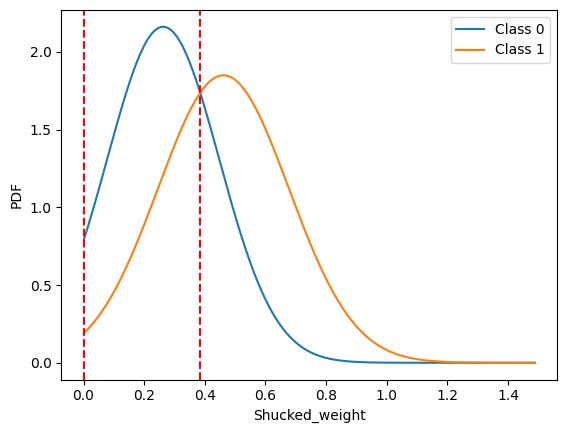

In [ ]:
# Get the Gaussian classifier for the 'length' feature
index = 4
feature = abalone.data.features.columns[index]

# Calculate the pdfs for the two classes
x_values = np.linspace(X_train[:,index].min(), X_train[:,index].max(), 1000)
pdf_class_0 = gaussian_classifiers0[index].pdf(x_values)
pdf_class_1 = gaussian_classifiers1[index].pdf(x_values)

# Find the decision boundary (where the two pdfs cross)
asign = np.sign(pdf_class_0-pdf_class_1)
decision_boundary = x_values[(np.roll(asign, 1) - asign) != 0]
# Plot the pdfs
plt.plot(x_values, pdf_class_0, label='Class 0')
plt.plot(x_values, pdf_class_1, label='Class 1')
# Plot the decision boundary
for i in decision_boundary:

  plt.axvline(i, color='red', linestyle='--')
# Add labels and legend
plt.xlabel(feature)
plt.ylabel('PDF')
plt.legend()
# Show the plot
plt.show()

## Enunciado punto 2

<ol type="a" start="1">
  <li>In this question, you will take all the combinations of pair of features. For each pair of features you will model the classes as bivariate Gaussian distributions with a covariance matrix Σ = Iσ, where σ is a scalar, shared by all the classes. This is, the distribution for each class has a different mean but the same covariance matrix.</li>
</ol>

In [ ]:
from scipy.stats import multivariate_normal
from itertools import combinations
# Get all combinations of pair of features
feature_pairs = combinations(range(len(abalone.data.features.columns)), 2)
# Initialize a dictionary to hold the Gaussian classifiers for each pair of features
gaussian_classifiers = {}
# Calculate the standard deviation for the covariance matrix
sigma = X_train.std().mean()
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

# For each pair of features in the training set
for pair in feature_pairs:
  # Initialize a dictionary to hold the Gaussian classifiers for each class
  gaussian_classifiers[pair] = {}
  accuracy_scores[pair] = {}
  precision_scores[pair] = {}
  recall_scores[pair] = {}

  # Calculate covariance matrix
  x1 = X_train[:,pair[0]]
  x2 = X_train[:,pair[1]]
  sum_ = [[x1.std(),0],[0,x2.std()]]
  sum_ = sigma*np.eye(2)
  means = []
  # For each class
  for class_label in np.unique(y_train):
    # Get the instances of the current class
    instances = X_train[y_train.reshape(-1) == class_label]
    # Estimate the parameters (mean) of the Gaussian distribution for each feature
    mean = [instances[pair[0]].mean(),instances[pair[1]].mean()]
    means.append(mean)
    # Build the bivariate Gaussian classifier with the same covariance matrix for all classes
    gaussian_classifiers[pair][class_label] = multivariate_normal(mean=mean, cov=sum_)

  probabilities0 = gaussian_classifiers[pair][0].pdf(X_test[:,list(pair)])
  probabilities1 = gaussian_classifiers[pair][1].pdf(X_test[:,list(pair)])
  # Here, `predictions` is a numpy array containing the predicted probabilities for each instance in the validation set
  # You can then use these probabilities to make class predictions, evaluate the classifier, etc.
  predictions = (probabilities1 >= probabilities0).astype(int)

  # Calculate accuracy, precision, and recall
  accuracy = accuracy_score(y_test, predictions)
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  accuracy_scores[pair] = accuracy
  precision_scores[pair] = precision
  recall_scores[pair] = recall

  # Report the metrics
  print(f"Features: ({abalone.data.features.columns[pair[0]]},{abalone.data.features.columns[pair[1]]})")
  print(f"Classifier class 0 - Mean : {means[0]}, Std : {sigma}")
  print(f"Classifier class 1 - Mean : {means[1]}, Std : {sigma}")
  print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
  print("")

Features: (Length,Diameter)
Classifier class 0 - Mean : [0.32142857142857134, 0.2592857142857143], Std : 0.3156446720705451
Classifier class 1 - Mean : [0.36407142857142855, 0.39207142857142857], Std : 0.3156446720705451
Accuracy: 0.6330674401740392, Precision: 0.5714285714285714, Recall: 0.9745889387144993

Features: (Length,Height)
Classifier class 0 - Mean : [0.32142857142857134, 0.2312857142857143], Std : 0.3156446720705451
Classifier class 1 - Mean : [0.36407142857142855, 0.7005714285714285], Std : 0.3156446720705451
Accuracy: 0.5155910079767948, Precision: 1.0, Recall: 0.0014947683109118087

Features: (Length,Whole_weight)
Classifier class 0 - Mean : [0.32142857142857134, 0.4288571428571428], Std : 0.3156446720705451
Classifier class 1 - Mean : [0.36407142857142855, 0.45428571428571424], Std : 0.3156446720705451
Accuracy: 0.6410442349528644, Precision: 0.5774021352313167, Recall: 0.9701046337817638

Features: (Length,Shucked_weight)
Classifier class 0 - Mean : [0.3214285714285713

<ol type="a" start="2">
  <li>For each combination estimate the parameters using the training dataset and evaluate the classifier in the validation dataset. Which combination of parameters obtained the best performance? Report the evaluation results for the best performing combination.</li>
</ol>

In [ ]:
# Find the pair of features with the highest accuracy
best_accuracy_pair = max(accuracy_scores, key=accuracy_scores.get)
print(f"Pair of features with highest accuracy: ({abalone.data.features.columns[best_accuracy_pair[0]]},{abalone.data.features.columns[best_accuracy_pair[1]]}), \
  Accuracy: {accuracy_scores[best_accuracy_pair]}")
# Find the pair of features with the highest precision
best_precision_pair = max(precision_scores, key=precision_scores.get)
print(f"Pair of features with highest precision: ({abalone.data.features.columns[best_precision_pair[0]]},{abalone.data.features.columns[best_precision_pair[1]]}), \
  Precision: {precision_scores[best_precision_pair]}")
# Find the pair of features with the highest recall
best_recall_pair = max(recall_scores, key=recall_scores.get)
print(f"Pair of features with highest recall: ({abalone.data.features.columns[best_recall_pair[0]]},{abalone.data.features.columns[best_recall_pair[1]]}), \
  Recall: {recall_scores[best_recall_pair]}")

Pair of features with highest accuracy: (Whole_weight,Shell_weight),   Accuracy: 0.751269035532995
Pair of features with highest precision: (Length,Height),   Precision: 1.0
Pair of features with highest recall: (Length,Diameter),   Recall: 0.9745889387144993


Features: (Length,Shell_weight)
Accuracy: 0.7454677302393038, Precision: 0.7252124645892352, Recall: 0.7653213751868461

Features: (Diameter,Shell_weight)
Accuracy: 0.7440174039158811, Precision: 0.7046632124352331, Recall: 0.8131539611360239

Features: (Whole_weight,Shell_weight)
Accuracy: 0.751269035532995, Precision: 0.7315340909090909, Recall: 0.7698056801195815

<ol type="a" start="3">
  <li>Draw ROC curves for the best performing univariate model (from question 1) and bivariate model. Which model is better? Explain the results.</li>
</ol>

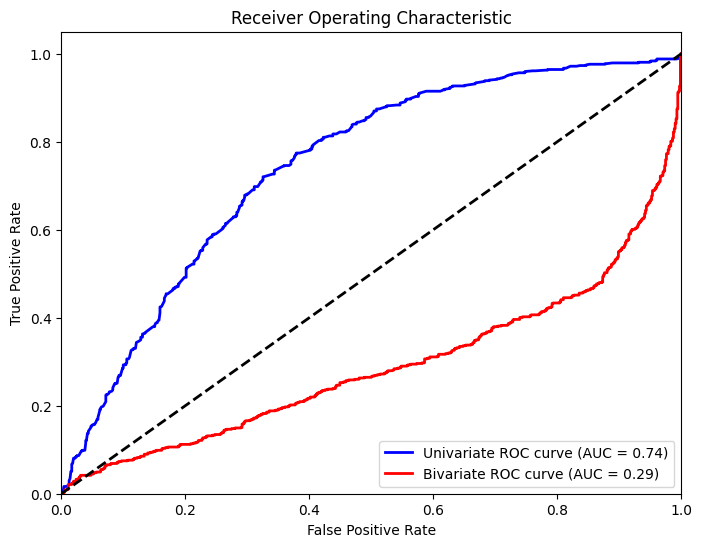

In [ ]:
from sklearn.metrics import roc_curve, auc

# Univariate model
# Get the Gaussian classifier for the 'Shell_weight' feature
index = 6
feature = abalone.data.features.columns[index]

# Calculate the pdfs for the two classes
pdf_class_0 = gaussian_classifiers0[index].pdf(X_test[:,index])
pdf_class_1 = gaussian_classifiers1[index].pdf(X_test[:,index])

# Calculate the ROC curve
fpr_uni, tpr_uni, thresholds_uni = roc_curve(y_test, pdf_class_1)

# Calculate the AUC
auc_uni = auc(fpr_uni, tpr_uni)

# Bivariate model
# Get the pair of features with the best performance
pair = best_accuracy_pair

# Calculate the pdfs for the two classes
mean_0 = gaussian_classifiers[pair][0].mean
mean_1 = gaussian_classifiers[pair][1].mean
pdf_class_0 = multivariate_normal(mean=mean_0, cov=sum_).pdf(X_test[:,list(pair)])
pdf_class_1 = multivariate_normal(mean=mean_1, cov=sum_).pdf(X_test[:,list(pair)])

# Calculate the ROC curve
fpr_bi, tpr_bi, thresholds_bi = roc_curve(y_test, pdf_class_1)

# Calculate the AUC
auc_bi = auc(fpr_bi, tpr_bi)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_uni, tpr_uni, color='blue', lw=2, label='Univariate ROC curve (AUC = %0.2f)' % auc_uni)
plt.plot(fpr_bi, tpr_bi, color='red', lw=2, label='Bivariate ROC curve (AUC = %0.2f)' % auc_bi)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


According to the ROC curve and the models' AUC, the univariate model is better. Because it has a higher AUC score.

## Enunciado punto 3
<ol type="a" start="1">
  <li>For the best bivariate model (from question 2) draw a plot, where the regions corresponding to the two classes are shown with different colors. A region corresponding to a class is the set of points where the particular class discriminant function is maximum (decision regions, [Alp14] Sect. 3.4).</li>
</ol>

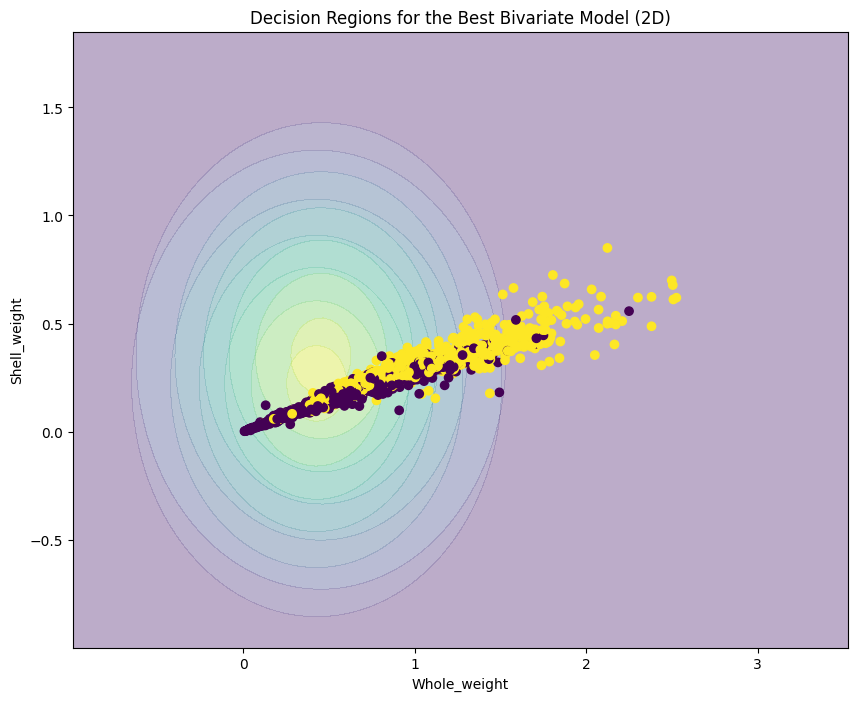

In [ ]:
def plot_decision_regions_2d(X_test, y_test, gaussian_classifiers, feature1, feature2):
    """
    Plots the decision regions of a bivariate Gaussian classifier along with the test dataset in 2D.

    Args:
    X_test: A 2D NumPy array containing the data points to be classified.
    y_test: A 1D NumPy array containing the labels for the test data.
    gaussian_classifiers: A dictionary containing the bivariate Gaussian classifiers for each pair of features.
    feature1: The index of the first feature.
    feature2: The index of the second feature.
    """

    # Define a meshgrid for the two features
    x_min, x_max = X_test[:, feature1].min() - 1, X_test[:, feature1].max() + 1
    y_min, y_max = X_test[:, feature2].min() - 1, X_test[:, feature2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Calculate the discriminant functions for each class
    Z0 = gaussian_classifiers[(feature1, feature2)][0].pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    Z1 = gaussian_classifiers[(feature1, feature2)][1].pdf(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(10, 8))
    contour0 = plt.contourf(xx, yy, Z0, alpha=0.2, cmap='viridis')
    contour1 = plt.contourf(xx, yy, Z1, alpha=0.2, cmap='viridis')

    # Plot the original data points
    plt.scatter(X_test[:, feature1], X_test[:, feature2], c=y_test, cmap='viridis')
    plt.xlabel(abalone.data.features.columns[feature1])
    plt.ylabel(abalone.data.features.columns[feature2])
    plt.title('Decision Regions for the Best Bivariate Model (2D)')


    plt.show()

# Usage example
plot_decision_regions_2d(X_test, y_test, gaussian_classifiers, best_accuracy_pair[0], best_accuracy_pair[1])


<ol type="a" start="2">
  <li>The boundary between class regions must be a line. Calculate the equation of this line clearly explaining the deduction process. Draw the line along with the regions..</li>
</ol>

## Enunciado punto 4
<ol type="a" start="1">
  <li>Using the best combination of parameters found in question 2 build a bivariate classifier, but this time the covariance matrix could be an arbitrary matrix (not diagonal) and different for each class.</li>
</ol>

<ol type="a" start="2">
  <li> Draw the regions corresponding to each class. Compare with the regions obtained in question 3. Discuss.</li>
</ol>

<ol type="a" start="3">
  <li>Add the possibility of rejection to your model. Draw the three regions corresponding to both classes and rejection. Discuss.</li>
</ol>